<a href="https://colab.research.google.com/github/The-DarK-os/deep-learning/blob/master/Tensorflow_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
% tensorflow_version 1.3.0
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.3.0`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.2


In [2]:
hello = tf.constant("Hello ")
world = tf.constant("World")
print(type(hello))
print(hello)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("Const:0", shape=(), dtype=string)


In [3]:
with tf.Session() as sess:
    result = sess.run(hello + world)

print(result)

b'Hello World'


In [4]:
a = tf.constant(10)
b = tf.constant(20)

with tf.Session() as sess:
    result = sess.run(a + b)
print(result)

30


In [5]:
const = tf.constant(10)
fill_mat = tf.fill((4,4),10)
myzeros = tf.zeros((4,4))
myones = tf.ones((4,4))
myrandn = tf.random_normal((4,4),mean =0,stddev=1.0)
myrandu = tf.random_uniform((4,4),minval=1,maxval=100)

my_ops = [const,fill_mat,myzeros,myones,myrandn,myrandu]
sess = tf.InteractiveSession()
for op in my_ops:
  print(sess.run(op))
  print("\n")

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[-1.8520833   1.9337419   0.18688537  0.37009844]
 [-0.14814566 -1.3597063  -0.36999524 -2.083477  ]
 [-0.45899054  1.6970389   0.15268362  1.3553015 ]
 [-0.4259027   1.8933915   0.95272416  2.2715664 ]]


[[53.597786 45.24094  17.986486 15.765415]
 [64.18354  93.15328  10.79204  67.04203 ]
 [25.042227 60.91365  99.85597  54.868877]
 [ 2.057505 35.81505  46.006306 16.39342 ]]




In [6]:
a = tf.constant([ [1,2],
                 [3,4] ])
print(a.get_shape())

b = tf.constant( [ [10], [100] ])
print(b.get_shape())

result = tf.matmul(a,b)
sess.run(result)

(2, 2)
(2, 1)


array([[210],
       [430]], dtype=int32)

In [7]:
n1 = tf.constant(1)
n2 = tf.constant(2)
n3 = n1 + n2

with tf.Session() as sess:
  result = sess.run(n3)
print(result)

3


In [8]:
graph = tf.Graph()
print(graph)

In [9]:
graph_one = tf.get_default_graph()
graph_two = tf.Graph()

with graph_two.as_default():
    print(graph_two is tf.get_default_graph)
    print(graph_two)
    print(tf.get_default_graph)

False
<function get_default_graph at 0x7f19a7bfbd40>


In [10]:
sess = tf.InteractiveSession()
my_tensor = tf.random_uniform((4,4),0,1)
my_var = tf.Variable(initial_value=my_tensor)
init = tf.global_variables_initializer()
sess.run(init)
sess.run(my_var)

/tensorflow-1.15.2/python3.7/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


array([[0.04975986, 0.99581766, 0.10242879, 0.40041912],
       [0.19080007, 0.8801094 , 0.17366719, 0.37761295],
       [0.9700115 , 0.48207593, 0.30596864, 0.955881  ],
       [0.5483284 , 0.53536594, 0.4511162 , 0.5529852 ]], dtype=float32)

In [11]:
ph = tf.placeholder(tf.float32,shape =(None,5))

## **Simple Regression**

In [12]:
import numpy as np
np.random.seed(101)
tf.set_random_seed(101)

In [13]:
rand_a = np.random.uniform(0,100,(5,5))
rand_b = np.random.uniform(0,100,(5,1))

In [14]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

add_op = a+b

mul_op = a*b

In [15]:
with tf.Session() as sess:
  add_result = sess.run(add_op,feed_dict = {a:rand_a,b:rand_b})
  mult_result = sess.run(mul_op , feed_dict = {a:rand_a,b:rand_b})

print(add_result)
print("\n")
print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


In [16]:
n_features = 10
n_dense_neurons = 3

x = tf.placeholder(tf.float32,(None,n_features))
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))

xW = tf.matmul(x,W)
z = tf.add(xW,b)
a = tf.sigmoid(z)

In [17]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a,feed_dict = {x:np.random.random([1,n_features])})
print(layer_out)

[[0.79932886 0.6884799  0.995776  ]]


In [18]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

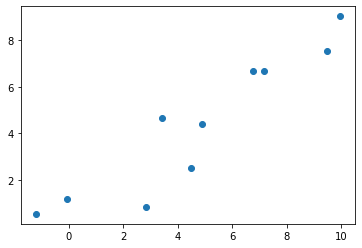

In [19]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_label,"o")

In [20]:
m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))
error = 0
for x,y in zip(x_data,y_label):
  y_hat = m*x + b
  error += (y-y_hat)**2

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [21]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  training_steps = 1000
  for i in range(training_steps):
    sess.run(train)
  final_slope , final_intercept = sess.run([m,b])

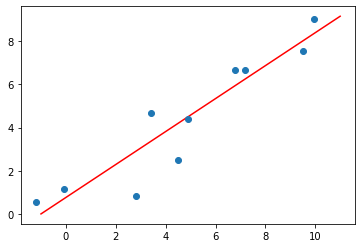

In [22]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope * x_test + final_intercept
plt.plot(x_test,y_pred_plot,"r")
plt.plot(x_data,y_label,"o")

# Another example


In [23]:
rand_x = np.random.uniform(low=1,high=10,size =(5,5))
rand_y = np.random.uniform(low=1,high=10,size=(5,1))
print(rand_y)

[[3.04890304]
 [1.43351997]
 [9.13574222]
 [1.72093185]
 [6.46494645]]


In [24]:
ph_1 = tf.placeholder(tf.float32)
ph_2 = tf.placeholder(tf.float32)

add_op = ph_1 + ph_2
mul_op = ph_1 * ph_2

In [25]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  addition = sess.run(add_op,feed_dict = {ph_1: rand_x , ph_2 : rand_y})
  multiplication = sess.run(mul_op,feed_dict = {ph_1: rand_x , ph_2: rand_y})

print(addition)
print("\n")
print(multiplication)

[[12.592279   8.352409   8.1989765  9.784504   6.970375 ]
 [ 3.4917226  2.8934288  8.172448   9.743914   8.465864 ]
 [16.001652  13.956862  16.045101  12.018196  16.075062 ]
 [ 7.4875426  9.457615   3.5647435  9.781629   8.90611  ]
 [13.720653  11.936745  16.243196   9.296695  10.15613  ]]


[[29.09683   16.169878  15.702076  20.536196  11.956188 ]
 [ 2.9504747  2.0928087  9.660388  11.913115  10.081005 ]
 [62.725174  44.04451   63.122112  26.333351  63.395844 ]
 [ 9.923944  13.314305   3.1730745 13.87191   12.365202 ]
 [46.907753  35.374886  63.21586   18.307102  23.863304 ]]


In [26]:
n_features = 10
n_neurons = 3

x = tf.placeholder(tf.float32 , [None , n_features])
W = tf.Variable(tf.random_normal([n_features,n_neurons]))
b = tf.Variable(tf.ones([n_neurons]))


xW = tf.matmul(x,W)
z = tf.add(xW,b)
a = tf.sigmoid(z)

In [27]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
  sess.run(init)
  layer_output = sess.run(a , feed_dict = {x: np.random.random([1,n_features])})
layer_output

array([[0.9730822, 0.7528964, 0.1333703]], dtype=float32)

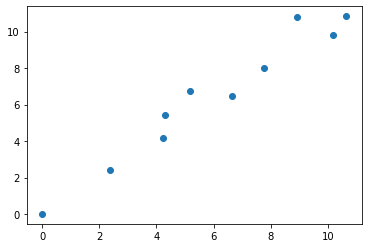

In [28]:
from sklearn.datasets import make_blobs
data = make_blobs()
x_data = np.linspace(1,11,10) + np.random.uniform(-1,1.5,10)
y_label = np.linspace(1,11,10) + np.random.uniform(-1,1.5,10)
plt.plot(x_data,y_label,"o")

In [29]:
m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))

errors = 0

for x,y in zip(x_data,y_label):
  y_hat = m*x + b
  errors += (y-y_hat)**2
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001)
train = optimizer.minimize(errors)

In [30]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  training_epoch = 1000
  for i in range(training_epoch):
    sess.run(train)
  final_slope , final_intercept = sess.run([m,b])


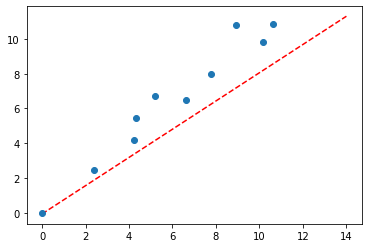

In [31]:
x_test = np.linspace(-1,11,15)
y_test_plot = final_slope * x_test + final_intercept

plt.plot(y_test_plot , "--r")
plt.plot(x_data,y_label,"o")

# **Sample Regression task**

In [34]:
import pandas as pd
x_data = np.linspace(0.0,10.0 , 1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5 * x_data) + 5 + noise

x_df = pd.DataFrame(data = x_data,columns = ["X Data"])
y_df = pd.DataFrame(data = y_true , columns = ["Y Data"])


my_data = pd.concat([x_df,y_df],axis=1)
my_data.head()

,X Data,Y Data
0,0.00000,5.241332
1,0.00001,5.952007
2,0.00002,5.984872
3,0.00003,4.970151
4,0.00004,3.734034


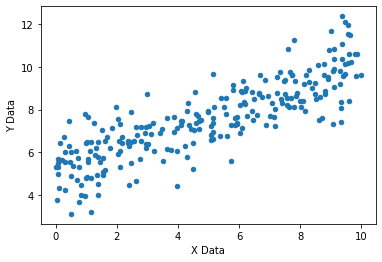

In [38]:
my_data.sample(n=250).plot(kind= "scatter",x="X Data",y="Y Data")

In [41]:
batch_size = 8
m = tf.Variable(0.81)
b = tf.Variable(0.17)

xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

y_model = m*xph + b
error = tf.reduce_sum(tf.square(yph-y_model))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [44]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  batches = 10000
  for i in range(batches):
    rand_ind = np.random.randint(len(x_data),size=batch_size)
    feed = {xph: x_data[rand_ind],yph: y_true[rand_ind]}
    sess.run(train,feed_dict=feed) 
  model_m , model_b = sess.run([m,b])

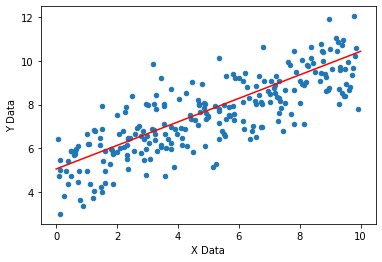

In [45]:
y_hat = x_data * model_m + model_b
my_data.sample(250).plot(kind="scatter",x="X Data",y="Y Data")
plt.plot(x_data,y_hat,"r")

# **Estimator**

In [47]:
feat_cols = [tf.feature_column.numeric_column("x",shape=[1])]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwra8xkuj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f197d37f310>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [51]:
input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

train_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

test_input_func = tf.estimator.inputs.numpy_input_fn({"x":x_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [52]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpwra8xkuj/model.ckpt.
INFO:tensorflow:loss = 662.2175, step = 1
INFO:tensorflow:global_step/sec: 618.714
I

In [53]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-08-25T13:33:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwra8xkuj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2021-08-25-13:33:51
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1177462, global_step = 1000, label/mean = 7.5080214, loss = 8.94197, prediction/mean = 7.3845787
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [54]:
test_metrics = estimator.evaluate(input_fn = test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-08-25T13:39:30Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwra8xkuj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2021-08-25-13:39:32
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1083536, global_step = 1000, label/mean = 7.489738, loss = 8.866829, prediction/mean = 7.3627343
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 100

In [57]:
print(train_metrics)
print(test_metrics)

{'average_loss': 1.1177462, 'label/mean': 7.5080214, 'loss': 8.94197, 'prediction/mean': 7.3845787, 'global_step': 1000}
{'average_loss': 1.1083536, 'label/mean': 7.489738, 'loss': 8.866829, 'prediction/mean': 7.3627343, 'global_step': 1000}


In [59]:
new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({"x":new_data},shuffle=False)
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwra8xkuj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3596344], dtype=float32)},
 {'predictions': array([5.0315423], dtype=float32)},
 {'predictions': array([5.70345], dtype=float32)},
 {'predictions': array([6.3753586], dtype=float32)},
 {'predictions': array([7.0472665], dtype=float32)},
 {'predictions': array([7.7191744], dtype=float32)},
 {'predictions': array([8.391083], dtype=float32)},
 {'predictions': array([9.06299], dtype=float32)},
 {'predictions': array([9.734899], dtype=float32)},
 {'predictions': array([10.406807], dtype=float32)}]

In [60]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwra8xkuj/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


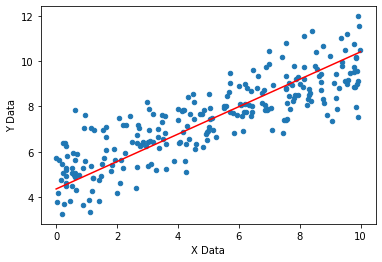

In [63]:
my_data.sample(n=250).plot(kind="scatter",x="X Data",y="Y Data")
plt.plot(new_data,predictions,"r")